 ## Decoding Authenticity: A Banknote Project with Decision Tree Classification

### Introduction:

In the ever-evolving landscape of finance, ensuring the integrity of banknotes is crucial. Leveraging machine learning techniques, specifically the Decision Tree classifier, can enhance the authentication process. This blog takes you through a fascinating journey into a banknote project where we employ a Decision Tree model to detect counterfeit banknotes. The dataset includes features like Image Variance, Image Skewness, Image Kurtosis, Entropy, and the critical Class label indicating whether the banknote is genuine or fake.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Understanding the Banknote Dataset:**<br>
**Data Collection:**<br>
The foundation of our project lies in a dataset that captures various features extracted from images of banknotes. These *features* include measures of *variance, skewness, kurtosis, and entropy.* The dataset is labeled with the Class attribute, differentiating between genuine and counterfeit banknotes.

In [2]:
df = pd.read_csv("bank_note_data.csv")
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Image.Var,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Image.Skew,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Image.Curt,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


**Data Preprocessing:**<br>
Clean and preprocess the data to address any missing values, normalize features, and ensure that the dataset is ready for training our Decision Tree model.

In [6]:
df.isna().sum()

Image.Var     0
Image.Skew    0
Image.Curt    0
Entropy       0
Class         0
dtype: int64

In [7]:
x = df.drop("Class", axis =1)
y = df["Class"]

In [8]:
x

,Image.Var,Image.Skew,Image.Curt,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [9]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

**Training the Decision Tree Classifier:**<br>
Split the dataset into training and testing sets. Train the Decision Tree classifier using features like Image Variance, Image Skewness, Image Kurtosis, and Entropy to predict the authenticity of banknotes.<br>

**Predictions and Evaluation:**<br>
Apply the trained Decision Tree model to new data to predict whether a banknote is genuine or fake. Evaluate the model's performance using metrics such as accuracy, precision, and recall to ensure its effectiveness in distinguishing between authentic and counterfeit banknotes.<br>

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2,random_state=2)

In [12]:
xtrain.shape

(1097, 4)

In [13]:
ytrain.shape

(1097,)

In [14]:
xtest.shape

(275, 4)

In [15]:
ytest.shape

(275,)

### Using gini

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc_gini = DecisionTreeClassifier(criterion='gini')
dtc_gini.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [34]:
print("Training score of DT classification : " , dtc_gini.score(xtrain,ytrain))

Training score of DT classification :  1.0


In [35]:
print("Testing score of DT classification : " , dtc_gini.score(xtest,ytest))

Testing score of DT classification :  0.9854545454545455


In [36]:
pred_dtc_gini = dtc_gini.predict(xtest)

In [37]:
print(pred_dtc_gini)

[0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0
 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0
 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1
 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0]


In [38]:
from sklearn.metrics import confusion_matrix
cm_gini = confusion_matrix(ytest,pred_dtc_gini)
print(cm_gini)

[[139   4]
 [  0 132]]


In [39]:
from sklearn.metrics import classification_report, accuracy_score

print("Classification Report \n", classification_report(ytest, pred_dtc_gini))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       143
           1       0.97      1.00      0.99       132

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [40]:
print("Accuracy:- \n", accuracy_score(ytest, pred_dtc_gini))

Accuracy:- 
 0.9854545454545455


### using Entropy

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc_ent = DecisionTreeClassifier(criterion='entropy')
dtc_ent.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

In [42]:
print("Training score of DT classification : " , dtc_ent.score(xtrain,ytrain))

print("Testing score of DT classification : " , dtc_ent.score(xtest,ytest))

Training score of DT classification :  1.0
Testing score of DT classification :  0.9745454545454545


In [43]:
ypred_dtc_ent = dtc_ent.predict(xtest)

In [44]:
ypred_dtc_ent

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [45]:
xtest

,Image.Var,Image.Skew,Image.Curt,Entropy
199,5.88620,5.87470,-2.81670,-0.30087
696,1.64500,7.86120,-0.87598,-3.55690
45,-0.78690,9.56630,-3.78670,-7.50340
738,0.92703,9.43180,-0.66263,-1.67280
792,-2.73380,0.45523,2.43910,0.21766
...,...,...,...,...
1202,-0.70346,2.95700,-3.59470,-3.14570
695,0.49571,10.22430,-1.09700,-4.01590
99,-2.74190,11.40380,2.53940,-5.57930
328,3.51520,6.82240,-0.67377,-0.46898


In [46]:
from sklearn.metrics import confusion_matrix
cm_ent = confusion_matrix(ytest, ypred_dtc_ent)
print(cm_ent)

[[137   6]
 [  1 131]]


In [47]:
from sklearn.metrics import classification_report,accuracy_score


In [52]:
print("Classification Report : \n ", classification_report(ytest,ypred_dtc_ent))

Classification Report : 
                precision    recall  f1-score   support

           0       0.99      0.96      0.98       143
           1       0.96      0.99      0.97       132

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275



In [53]:
print("Accuracy: " , accuracy_score(ytest, ypred_dtc_ent))

Accuracy:  0.9745454545454545


In [54]:
from sklearn import tree
tree_dtc = tree.export_text(dtc_gini)
print(tree_dtc)

|--- feature_0 <= 0.32
|   |--- feature_1 <= 5.87
|   |   |--- feature_2 <= 7.01
|   |   |   |--- feature_1 <= 4.09
|   |   |   |   |--- feature_0 <= -0.26
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  -0.26
|   |   |   |   |   |--- feature_2 <= 3.52
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  3.52
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  4.09
|   |   |   |   |--- feature_2 <= 1.83
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  1.83
|   |   |   |   |   |--- class: 0
|   |   |--- feature_2 >  7.01
|   |   |   |--- feature_1 <= -4.80
|   |   |   |   |--- feature_0 <= -0.78
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  -0.78
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -4.80
|   |   |   |   |--- class: 0
|   |--- feature_1 >  5.87
|   |   |--- feature_0 <= -3.43
|   |   |   |--- feature_3 <= -1.92
|   |   |   |   |--- class: 1
|   |   |   |--- feat

[Text(0.5052816901408451, 0.9375, 'X[0] <= 0.321\ngini = 0.492\nsamples = 1097\nvalue = [619, 478]'), Text(0.33098591549295775, 0.8125, 'X[1] <= 5.865\ngini = 0.315\nsamples = 516\nvalue = [101, 415]'), Text(0.2112676056338028, 0.6875, 'X[2] <= 7.006\ngini = 0.081\nsamples = 401\nvalue = [17, 384]'), Text(0.11267605633802817, 0.5625, 'X[1] <= 4.094\ngini = 0.013\nsamples = 296\nvalue = [2, 294]'), Text(0.056338028169014086, 0.4375, 'X[0] <= -0.257\ngini = 0.007\nsamples = 284\nvalue = [1, 283]'), Text(0.028169014084507043, 0.3125, 'gini = 0.0\nsamples = 249\nvalue = [0, 249]'), Text(0.08450704225352113, 0.3125, 'X[2] <= 3.521\ngini = 0.056\nsamples = 35\nvalue = [1, 34]'), Text(0.056338028169014086, 0.1875, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'), Text(0.11267605633802817, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(0.16901408450704225, 0.4375, 'X[2] <= 1.831\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'), Text(0.14084507042253522, 0.3125, 'gini = 0.0\nsamples = 11\nv

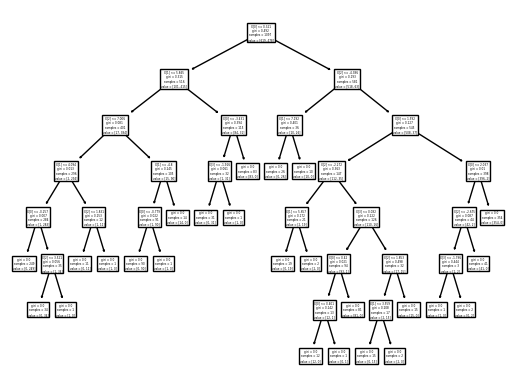

In [59]:
from sklearn import tree
tree2 = tree.plot_tree(dtc_gini)
print(tree2)

## Decision tree regression

In [60]:
df_dtr = pd.read_csv("petrol_consumption.csv")
df_dtr.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [62]:
df_dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [63]:
df_dtr.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


In [64]:
df_dtr.isna().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [66]:
x_dtr = df_dtr.drop("Petrol_Consumption", axis=1)

In [67]:
y_dtr = df_dtr["Petrol_Consumption"]

In [68]:
from sklearn.model_selection import train_test_split
xtrain_dtr, xtest_dtr, ytrain_dtr, ytest_dtr =  train_test_split(x_dtr,y_dtr,test_size=0.2, random_state=21)

In [70]:
from sklearn.tree import DecisionTreeRegressor  

In [71]:
DTR = DecisionTreeRegressor()
DTR.fit(xtrain_dtr, ytrain_dtr)

DecisionTreeRegressor()

In [72]:
print("Training score ", DTR.score(xtrain_dtr,ytrain_dtr))

Training score  1.0


In [74]:
print("Testing score ", DTR.score(xtest_dtr,ytest_dtr))

Testing score  -0.1821759314674214


**Conclusion:**<br>
The banknote project using a Decision Tree classifier showcases the powerful synergy between machine learning and financial security. By analyzing image-derived features, we can build a model that identifies patterns distinguishing genuine from counterfeit banknotes. The transparency and interpretability of Decision Trees contribute to a deeper understanding of the decision-making process, fostering trust in the model's predictions. As we continue to embrace innovative solutions in the realm of finance and technology, the application of machine learning in banknote authentication stands as a testament to the transformative potential of data-driven approaches in safeguarding financial systems.